In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer

/home/outcast/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Easy

In [2]:
path = "../data/CC GENERAL.csv"

In [3]:
df = pd.read_csv(path)

CUST_ID, TENURE - не будем рассматривать, они не дают какой-либо существенной информации о пользователе, также нормализуем данные и уберем nan

In [4]:
df = df.drop(['CUST_ID'], axis=1)
df = df.drop(['TENURE'], axis=1)
df = df.dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

Воспользуемся elbow методом для определения оптимального числа классов

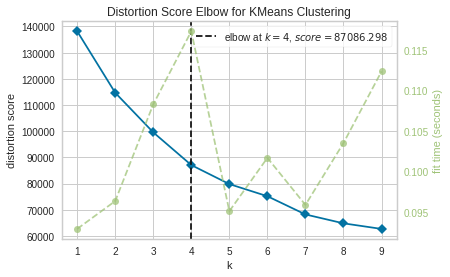

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(scaled_features_df)
visualizer.show()

Видно, что оптимально делить на 4 класса

In [6]:
model = KMeans(n_clusters = 4)
res = model.fit_predict(scaled_features_df)
scaled_features_df['clasterization'] = res

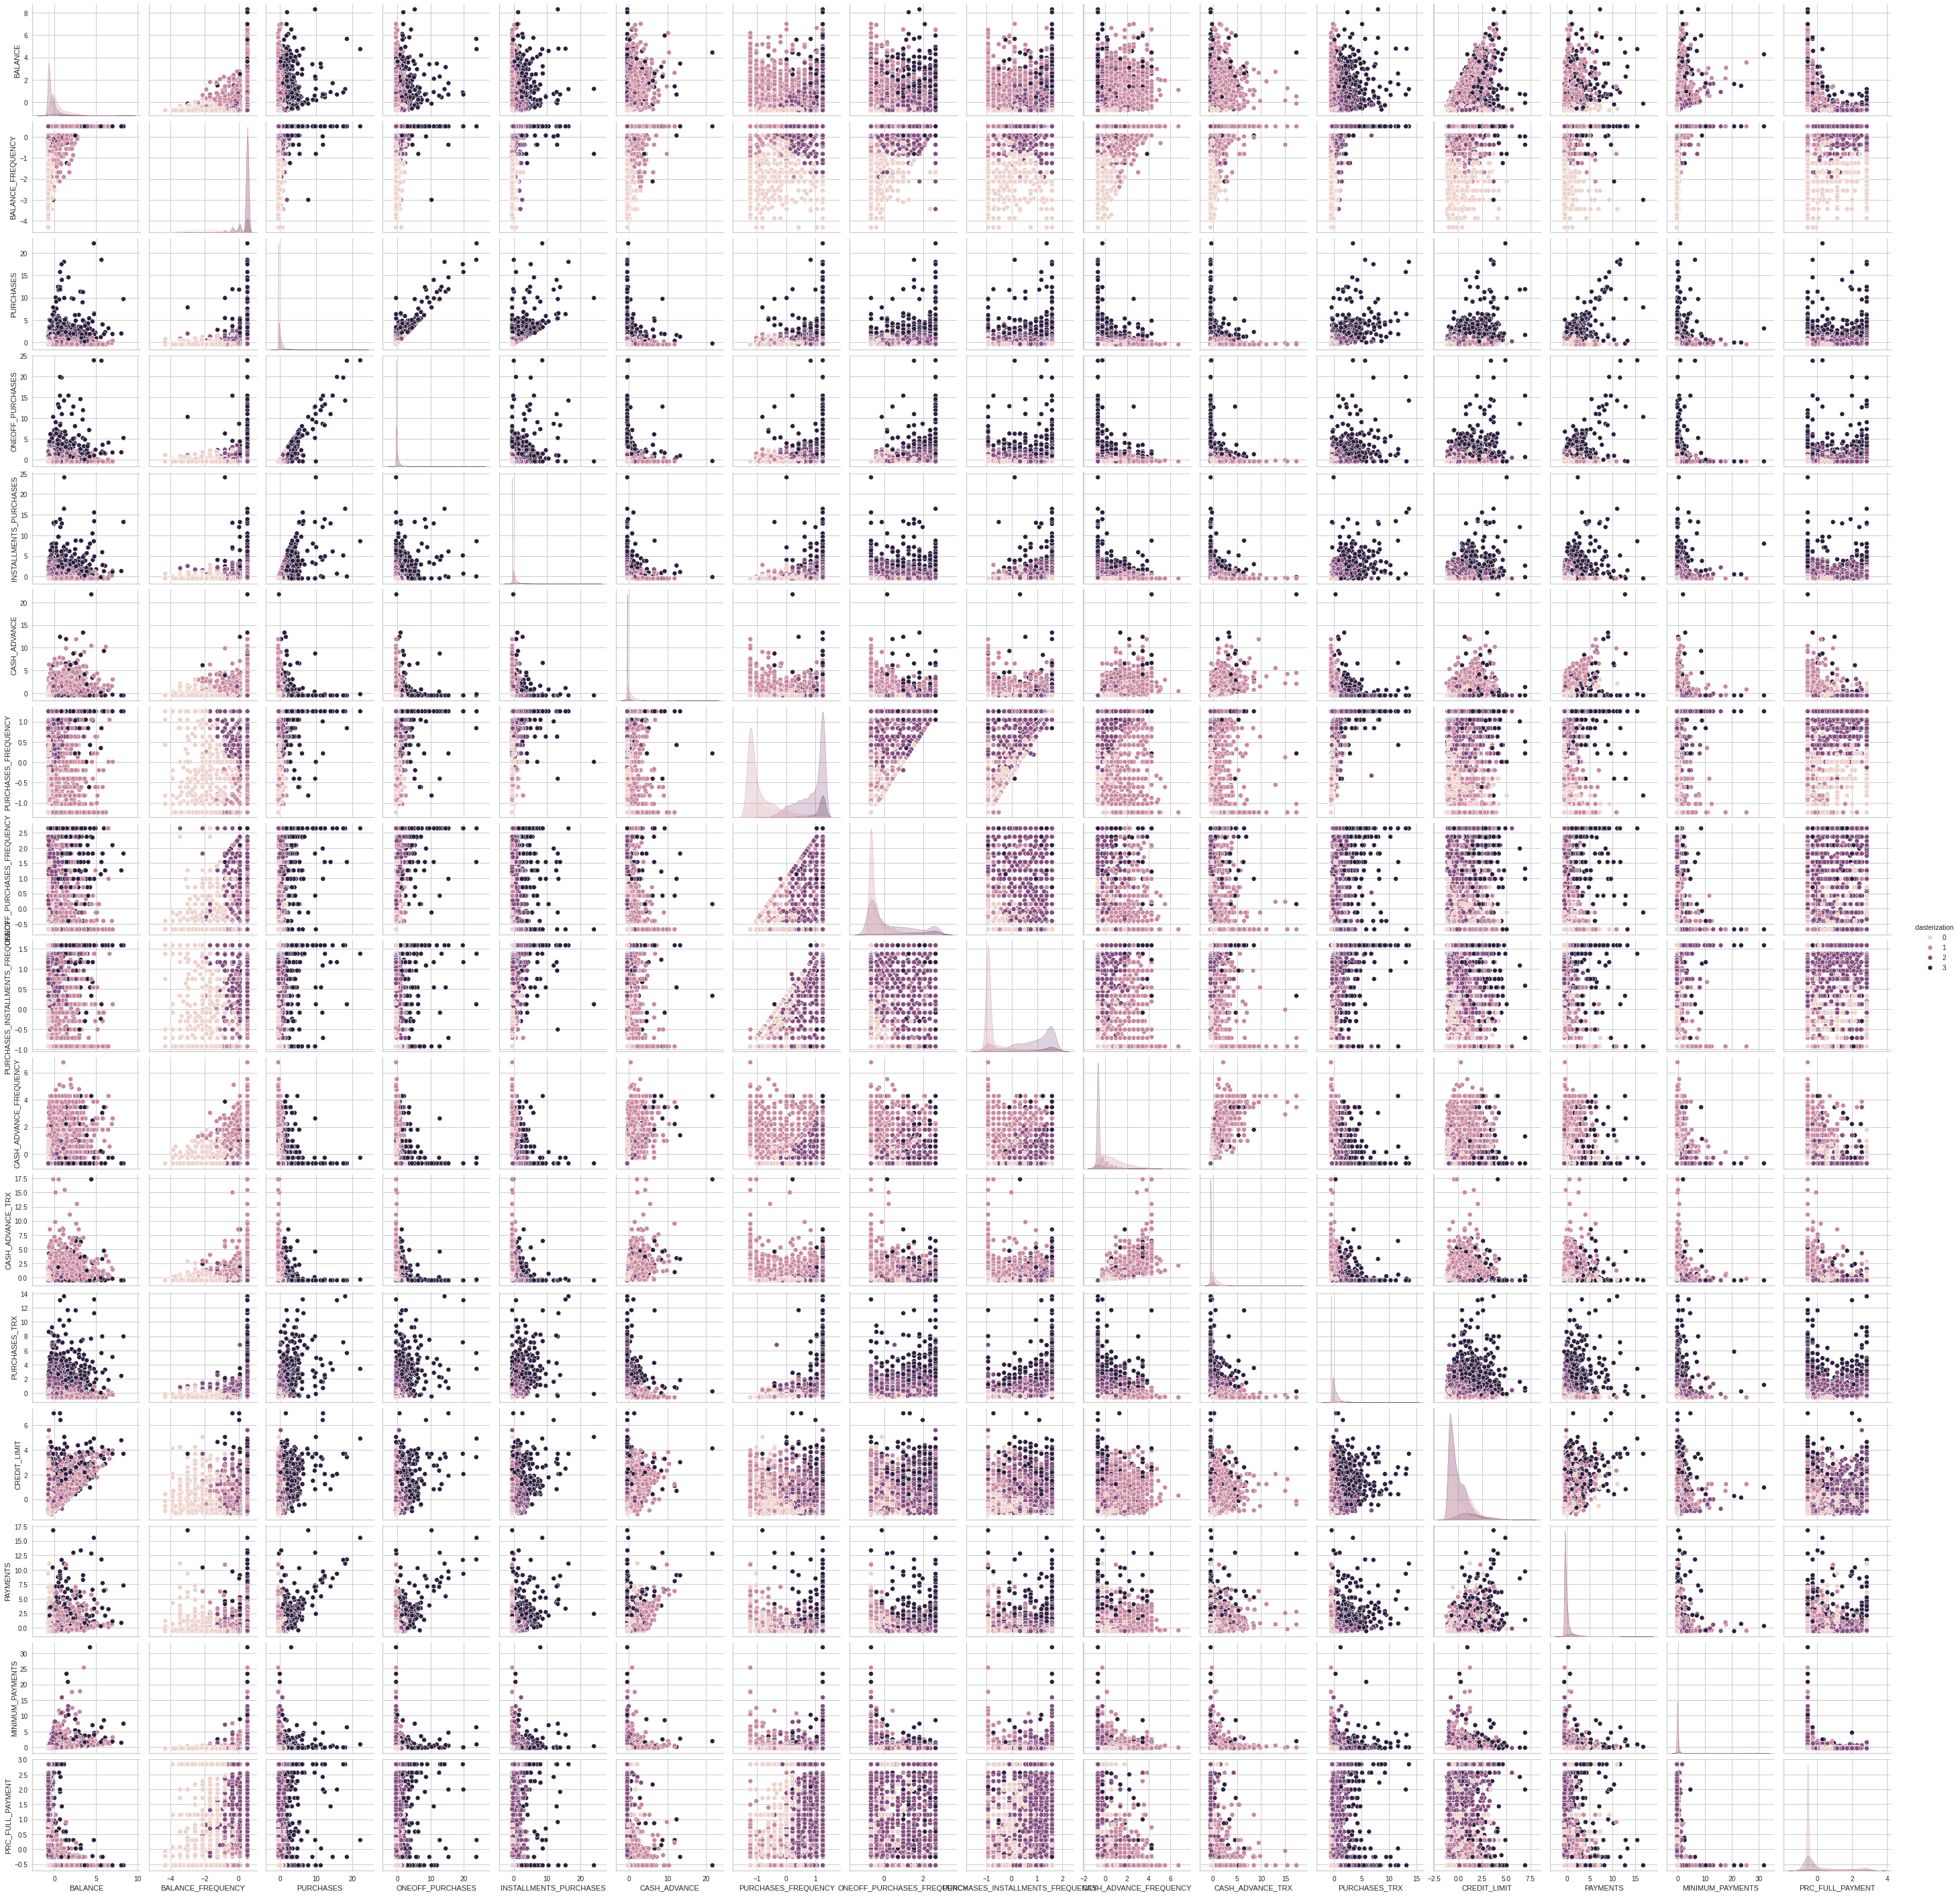

In [7]:
sns.pairplot(scaled_features_df, hue="clasterization")

Как видно по строчке с балансом - люди делятся на более обеспеченных и менее

Medium

Попробуем использовать dbscan, далее я руками подобрал относительно оптимальные eps и min_samples, так как при других распределение по классам было совсем не равномерным

In [8]:
if 'clasterization' in scaled_features_df.columns:
    scaled_features_df = scaled_features_df.drop(['clasterization'], axis=1)


res = DBSCAN(eps=0.8, min_samples=10).fit_predict(scaled_features_df)
unique, counts = np.unique(res, return_counts=True)
print (counts)

[4221 4391    5   19]


In [9]:
scaled_features_df['clasterization'] = res

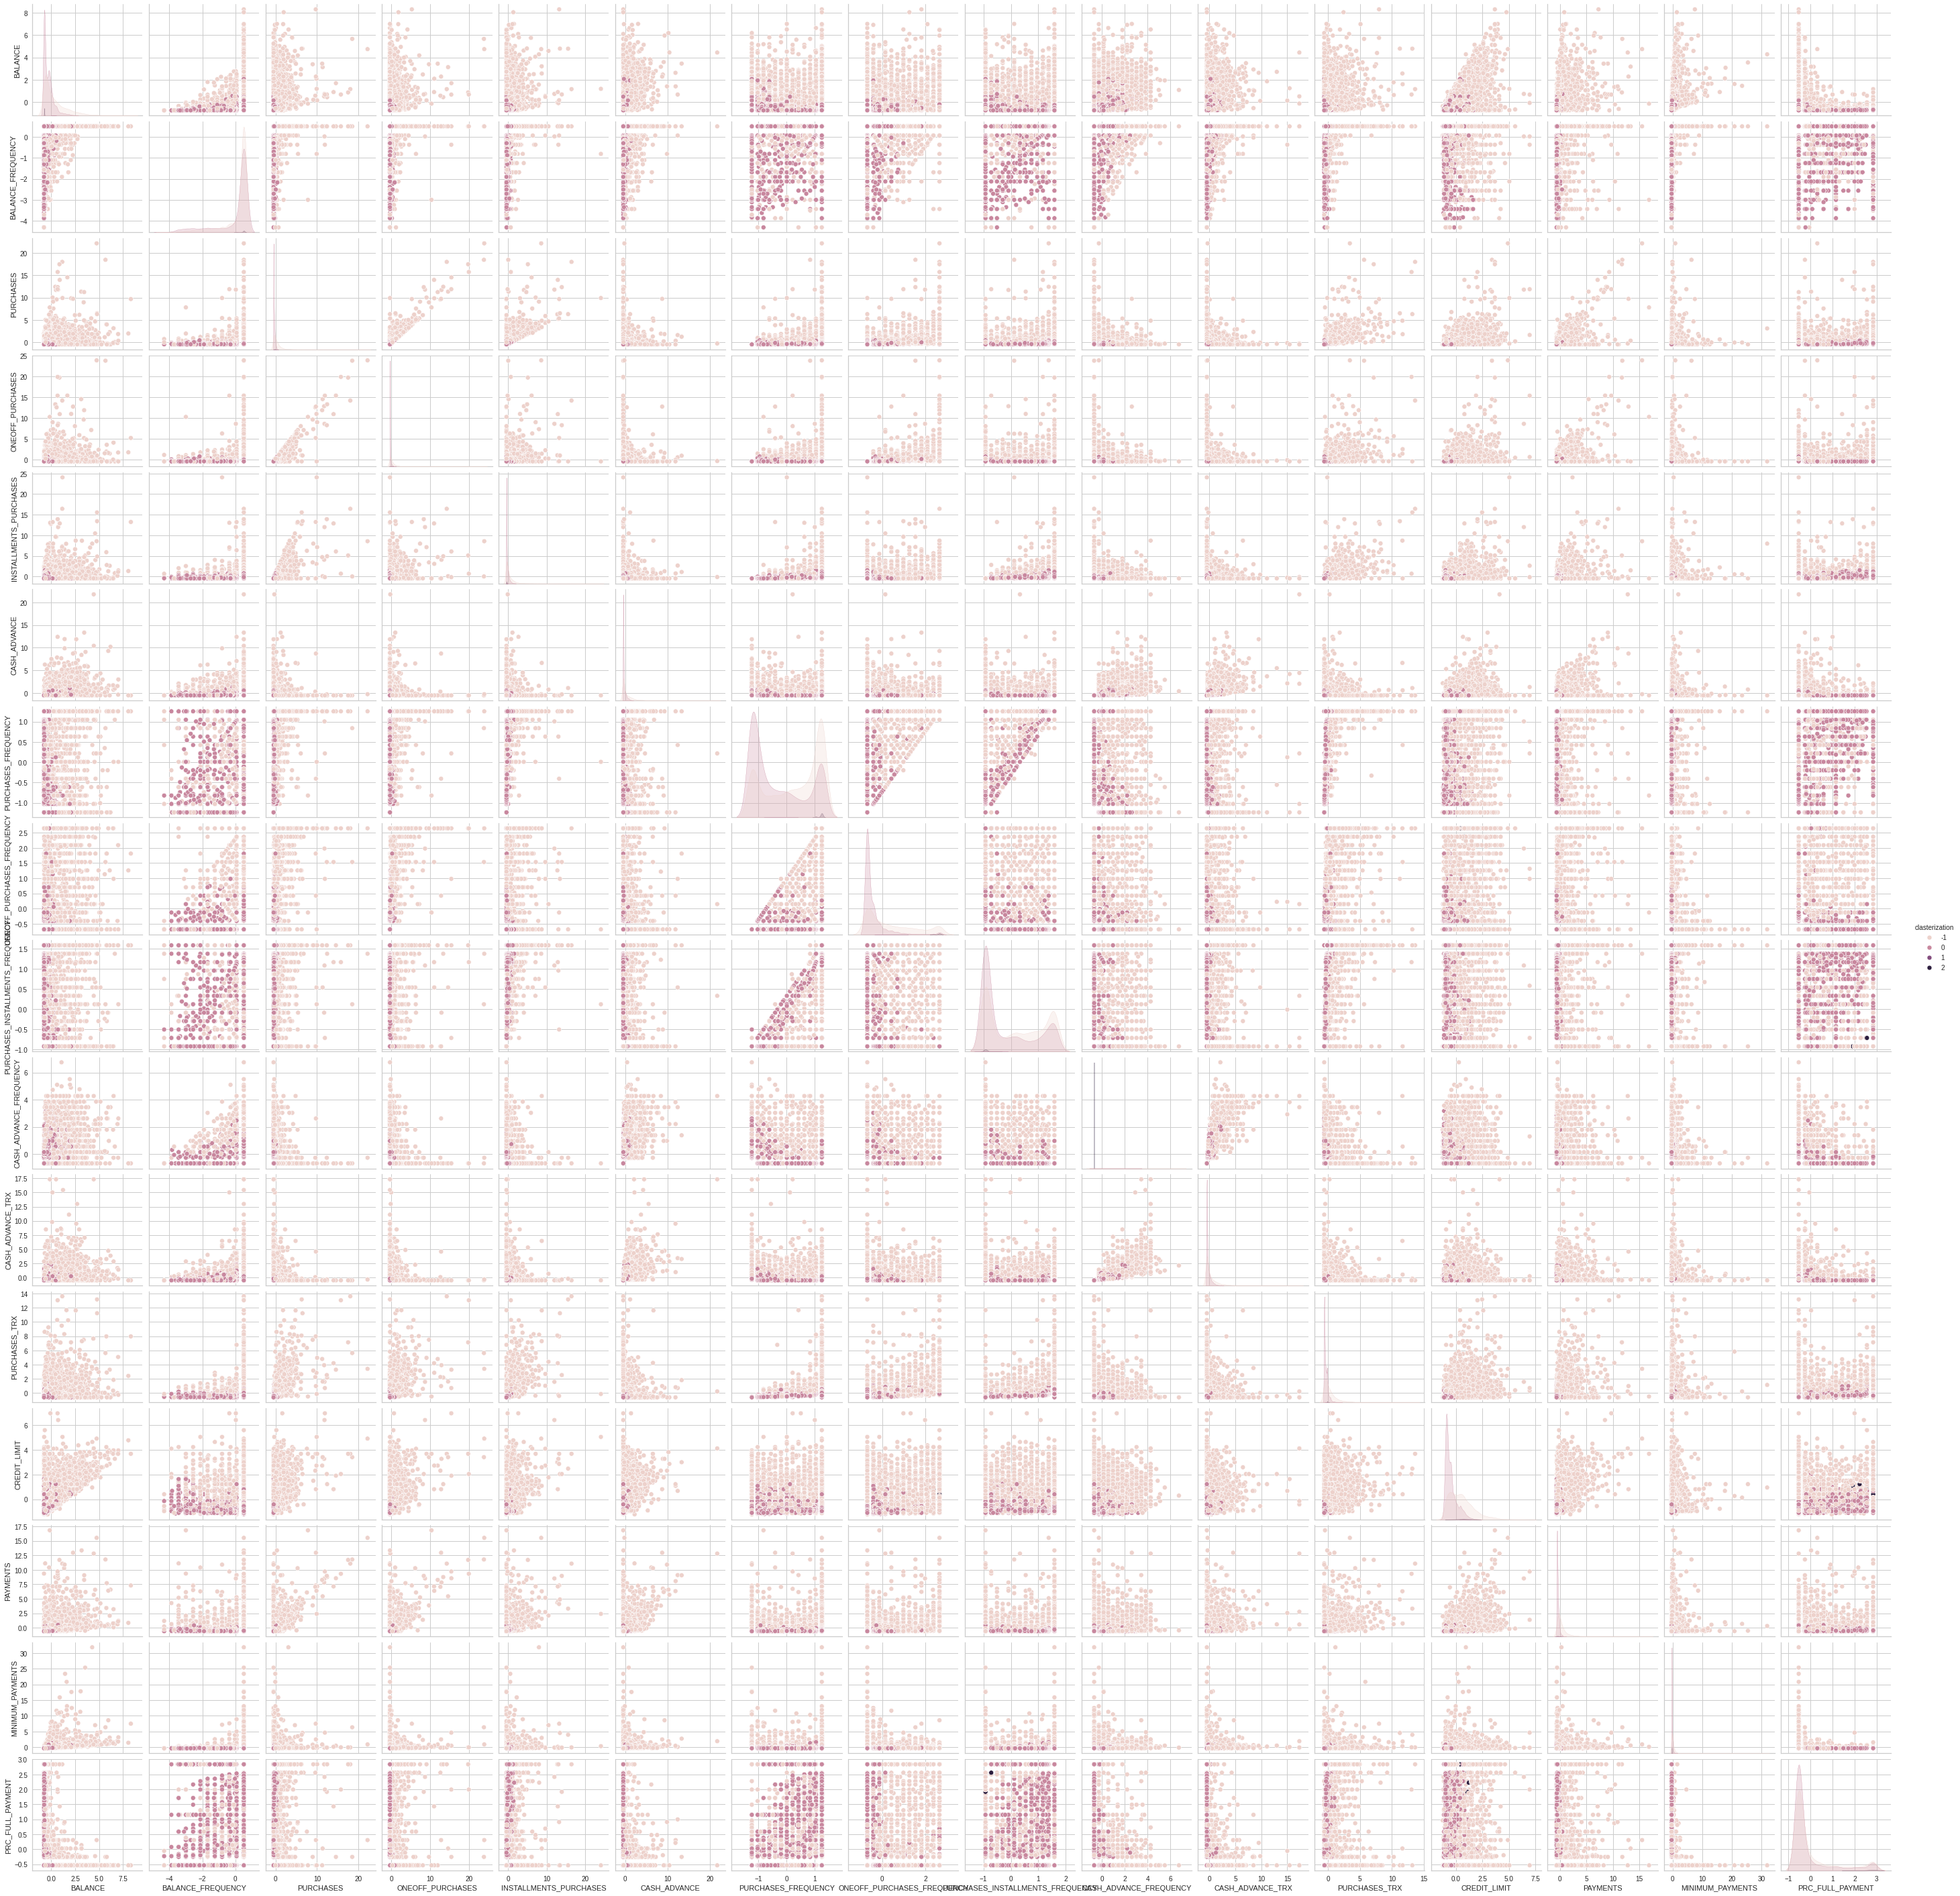

In [10]:
sns.pairplot(scaled_features_df, hue="clasterization")

Как видно dbscan тоже дает плюс-минус деление на бедных и богатых, хотя в явном виде я ни на одном графике классов не увидел